In [7]:
#import sklearn 
from sklearn.linear_model import LogisticRegression
import  numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
#Creating the data of binary labels for the logistic regression binary classifier 

In [9]:
x_0 = np.array([[1,7],[1,8],[2,7],[2,9],[1.5,8],[1.7, 7.5],[2.5,9],[3, 7]])
x_1 = np.array([[5, 2],[6,3],[5.8,2.9],[7,1],[8,4],[7,3],[9,2.5],[7,3.5],[5,8]])

In [10]:
x_0_x1 = x_0[:,0]
x_0_x2 = x_0[:, 1]
x_1_x1 = x_1[:,0]
x_1_x2 = x_1[:, 1]

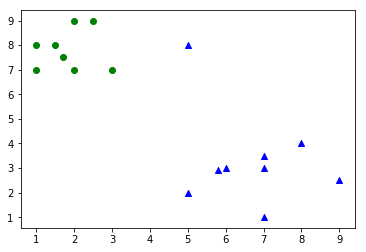

In [11]:
plt.scatter(x_0_x1, x_0_x2, Color = 'g', marker = 'o')
plt.scatter(x_1_x1, x_1_x2, Color = 'b', marker = '^')
plt.show()

In [142]:
X = np.append(x_0,x_1, axis = 0)
y = np.append(np.zeros(x_0.shape[0]), np.ones(x_1.shape[0]))
X.shape,y.shape

((17, 2), (17,))

In [93]:
# cool we have created the data by now 
# now time to implement the logistic regression class :)

In [127]:
class logisticregression:
    def __init__(self,lr=0.001,num_iter=100):
        self.lr=lr
        self.num_iter = num_iter
    def x_add(self,X):
        x_b=np.c_[np.ones((X.shape[0], 1)),X]
        return x_b
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
        
    def cost(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
   
    def fit(self,X,y):
        #making the X
        X=self.x_add(X)
        # initialising the weights random or with zero 
        self.theta=np.zeros((X.shape[1],1))
        for i in range(self.num_iter):
            z=np.dot(X,self.theta)
            h = self.sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta=self.theta-self.lr * gradient
           # print(i," cost ",self.cost(h,y))
      
    def predict_prob(self, X):
        X = self.x_add(X)
        return self.sigmoid(np.dot(X, self.theta))
    
    def predict(self, X, threshold=0.5):
        return self.predict_prob(X) >= threshold

In [149]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y)
x_train.shape,y_train.shape,x_test.shape,y_test.shape
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((12, 2), (5, 2), (12, 1), (5, 1))

In [150]:
l=logisticregression()
l.fit(x_train,y_train)
y_pred=l.predict(x_test)
        

In [151]:
(y_pred==y_test).mean() # approx 

1.0

In [164]:
# the things i will upload soon is --
# The code with the good dataset 
# The multinomial logistic regression implementation :) 